In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression




df = pd.read_csv(r"C:\Users\User\Downloads\pima-data.csv")


In [2]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
df.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object

<Axes: >

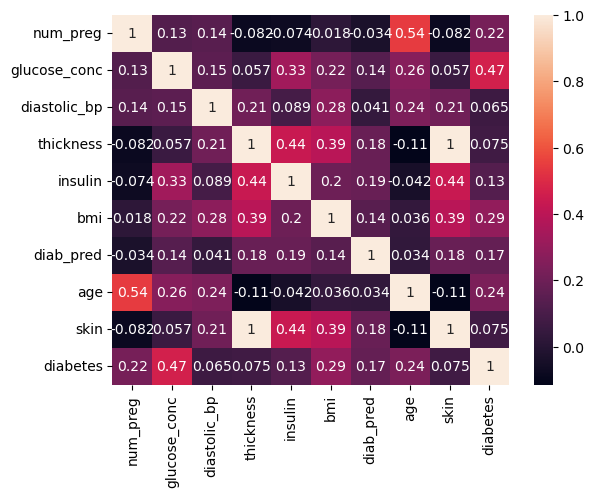

In [4]:
sns.heatmap(df.corr(),annot=True  )

In [5]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [6]:
df.shape

(768, 10)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


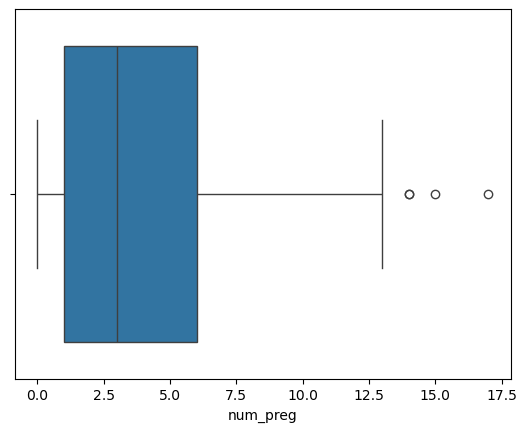

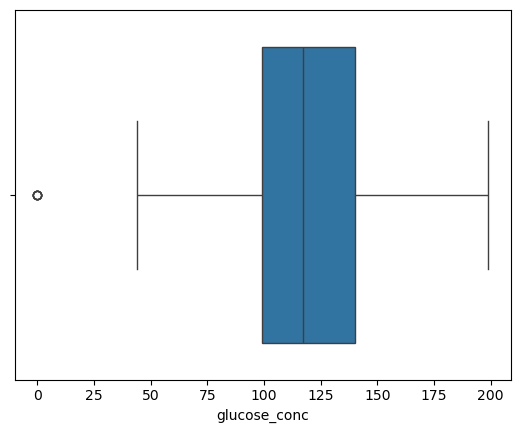

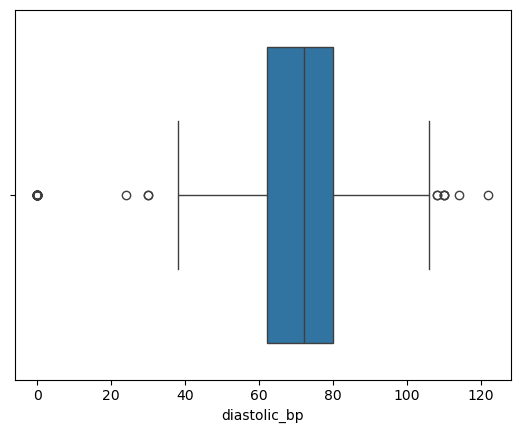

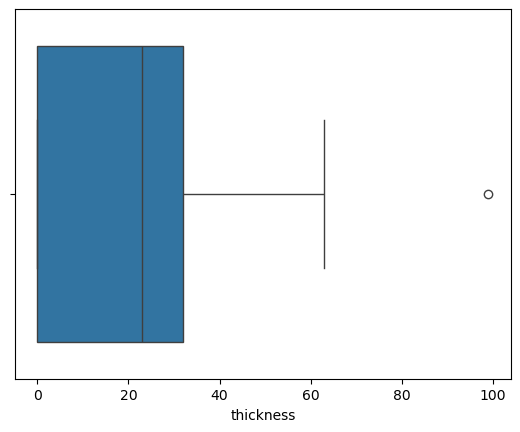

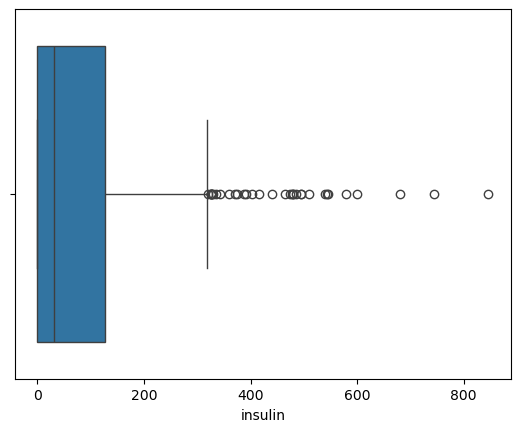

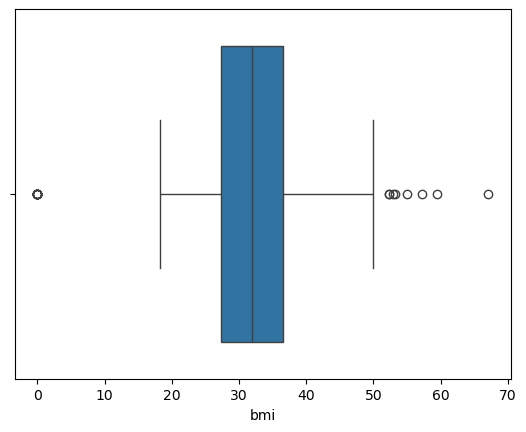

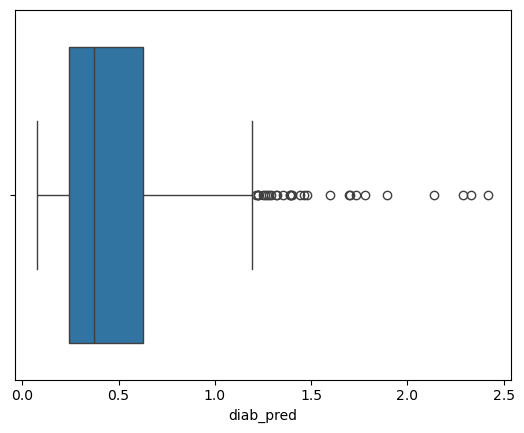

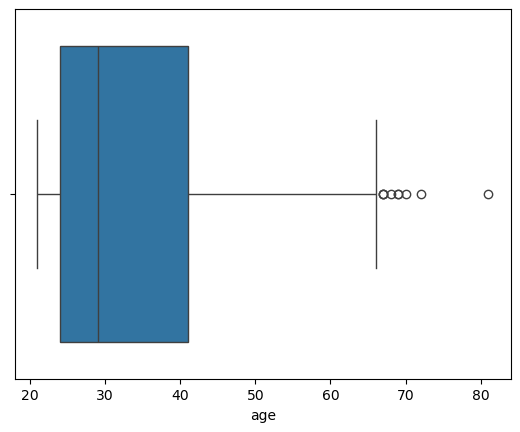

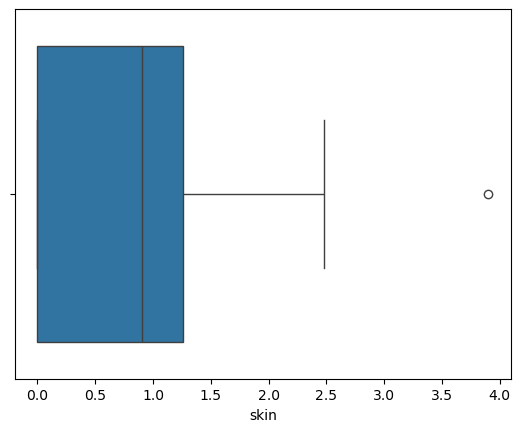

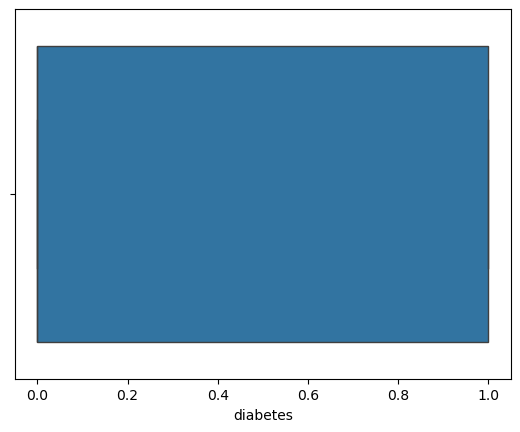

In [9]:
for i in  df .columns : 
    sns.boxplot(data=df ,x=i )
    plt.show()

In [10]:
def check_outliers(df):
    new_df = df.copy()
    for col in df.columns:
        upper_limit = new_df[col].mean() + 3 * new_df[col].std()
        lower_limit = new_df[col].mean() - 3 * new_df[col].std()
        new_df = new_df.loc[(new_df[col] <= upper_limit) & (new_df[col] >= lower_limit)]
    return new_df


In [11]:
df_cleaned = check_outliers(df)

In [12]:
df_cleaned.shape

(685, 10)

In [13]:

x= df.drop('diabetes',axis=1 )
y=df['diabetes'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


<Axes: ylabel='diabetes'>

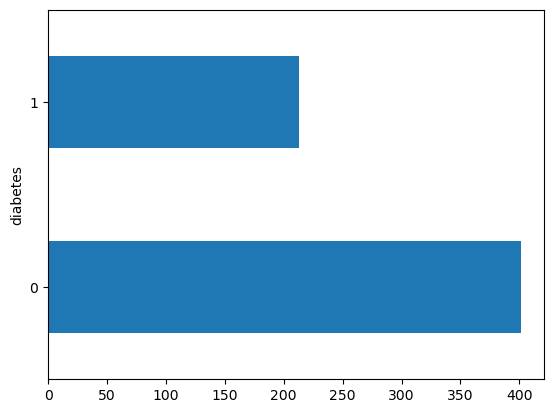

In [14]:
y_train.value_counts().plot(kind='barh')

In [15]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_s,y_s=sm.fit_resample(x_train,y_train)

<Axes: ylabel='diabetes'>

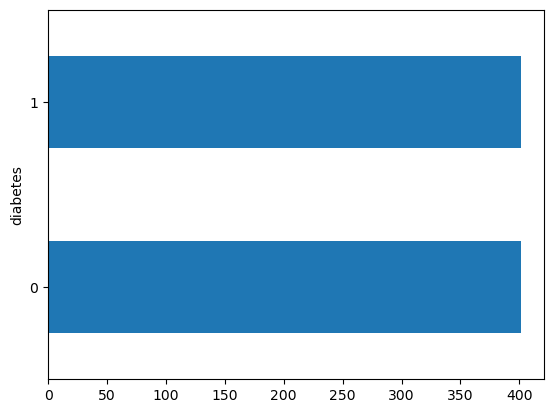

In [16]:
y_s.value_counts().plot(kind='barh')

In [17]:
# save models and accuracy
models=[]
accurcy=[] 
test_accurcy=[] 

In [18]:
# before using smote 
param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] ,
           'C':[0.5,1,2]  
           }
grid_serach= GridSearchCV(estimator=SVC(), param_grid=param_grid,cv=3 ,scoring='accuracy',verbose=1,n_jobs=-1 )

In [19]:
grid_serach.fit(x_train , y_train )
print("Best Parameters:", grid_serach.best_params_)
print("Best Accuracy:", grid_serach.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 0.5, 'kernel': 'linear'}
Best Accuracy: 0.7670492587278814


C:\Users\User\AppData\Local\Temp\ipykernel_26264\1159891386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results['param_kernel'],


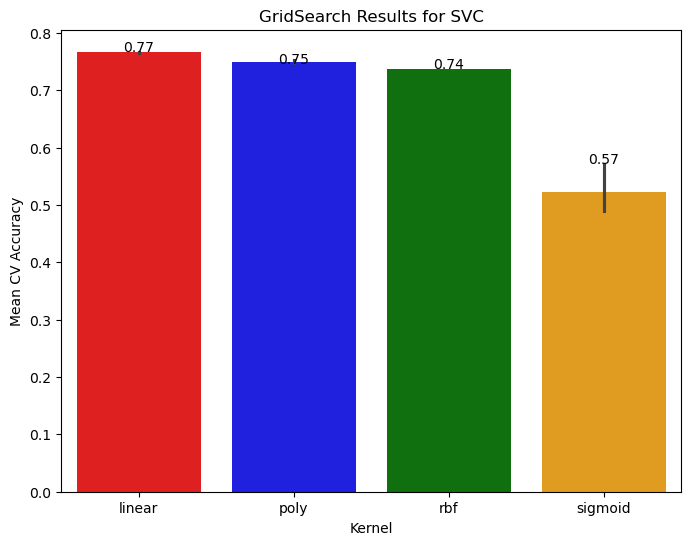

In [20]:
results = grid_serach.cv_results_
plt.figure(figsize=(8,6))
ax = sns.barplot(x=results['param_kernel'], 
                 y=results['mean_test_score'], 
                 palette=['red','blue','green','orange'])
for i, score in enumerate(results['mean_test_score'][:4]):
    ax.text(i, score , f"{score:.2f}", ha='center')
plt.ylabel("Mean CV Accuracy")
plt.xlabel("Kernel")
plt.title("GridSearch Results for SVC")
plt.show()

In [21]:
# after using smote 

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Accuracy: 0.7630713473829355


C:\Users\User\AppData\Local\Temp\ipykernel_26264\3979349238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results['param_kernel'],


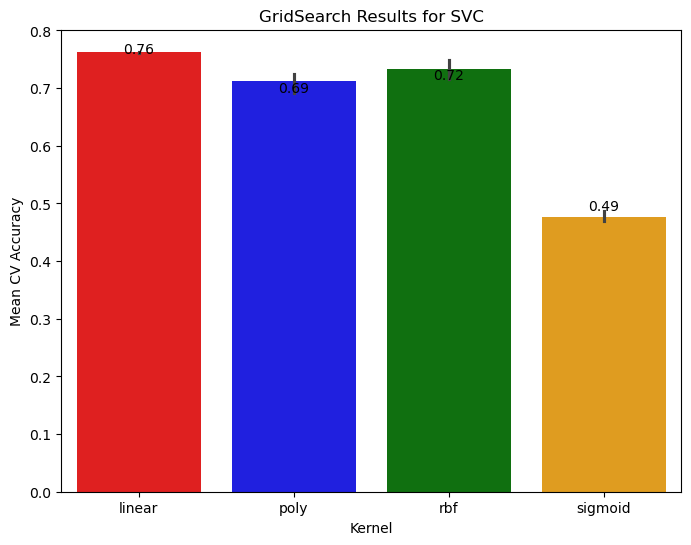

In [22]:
grid_serach.fit(x_s , y_s )
print("Best Parameters:", grid_serach.best_params_)
print("Best Accuracy:", grid_serach.best_score_)

results = grid_serach.cv_results_

plt.figure(figsize=(8,6))
ax = sns.barplot(x=results['param_kernel'], 
                 y=results['mean_test_score'], 
                 palette=['red','blue','green','orange'])



for i, score in enumerate(results['mean_test_score'][:4]):
    ax.text(i, score , f"{score:.2f}", ha='center')



plt.ylabel("Mean CV Accuracy")
plt.xlabel("Kernel")
plt.title("GridSearch Results for SVC")
plt.show()
models.append('SVC')
accurcy.append( grid_serach.best_score_)

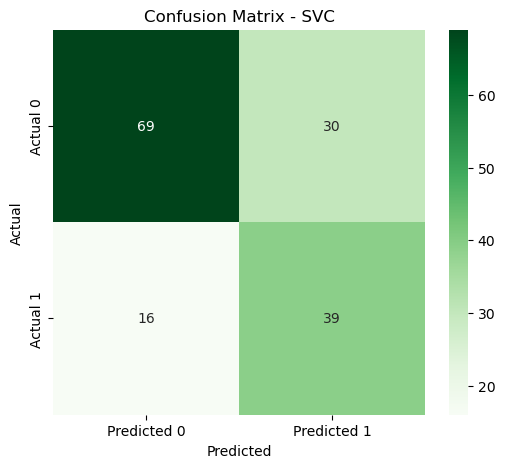

0.7012987012987013


In [23]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test ,grid_serach.best_estimator_.predict(x_test)), annot=True, fmt='d', cmap="Greens", 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVC')
plt.show()
test_accurcy.append(accuracy_score(y_test ,grid_serach.best_estimator_.predict(x_test) ))
print(test_accurcy[-1])


why scores are different ? 
1- SVC relies on the margins between classes. When using SMOTE, it generates synthetic points for the minority class in the feature space. The problem is that these points can sometimes be very close to the other class (especially if there is overlap between the classes). As a result, SVC may get confused and attempt to draw a complex decision boundary → which leads to decreased accuracy or overfitting.

In [24]:
param_grid= {'n_estimators': [100,150,200] ,
   "learning_rate"    : [1, 0.05,.1] ,
  "max_depth"        : [ 5, 4],
  "colsample_bytree" : [  0.8 , 0.9 ]
           }
grid_serach= GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid,cv=5 ,scoring='accuracy',verbose=1,n_jobs=-1 )
grid_serach.fit(x_s , y_s )
print("Best Parameters:", grid_serach.best_params_)
print("Best Accuracy:", grid_serach.best_score_)


models.append('XGBClassifier')
accurcy.append( grid_serach.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Accuracy: 0.8354503105590062


XGBoost is based on decision trees + boosting.Trees are very good at handling data with overlap or even noise.When you do SMOTE:The minority class grows and spreads better.Trees can capture new patterns and balance the splits.The result: improvement in the balance between classes, and thus often the accuracy or recall of the minority class improves.

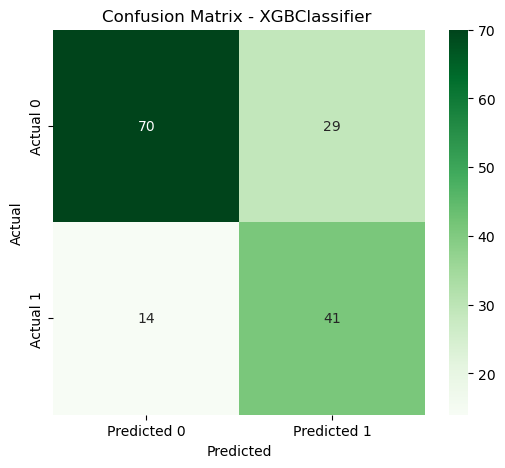

0.7207792207792207


In [25]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test ,grid_serach.best_estimator_.predict(x_test)), annot=True, fmt='d', cmap="Greens", 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - XGBClassifier ')
plt.show()
test_accurcy.append(accuracy_score(y_test ,grid_serach.best_estimator_.predict(x_test) ))
print(test_accurcy[-1])


In [26]:
from xgboost import plot_tree,plot_importance

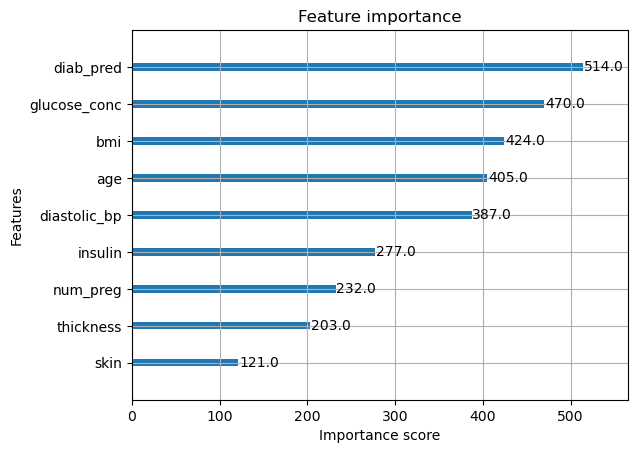

In [27]:

ax=plot_importance(grid_serach.best_estimator_)

In [28]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [ 9 , 5],
    
    'min_samples_split': [ 9,6, 5]
}

In [29]:

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(x_s,y_s)
print( ' best score is ', grid_search.best_score_)
print( ' best parameters is ', grid_search.best_params_)


models.append('Random Forest')
accurcy.append( grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
 best score is  0.8317546583850932
 best parameters is  {'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 250}


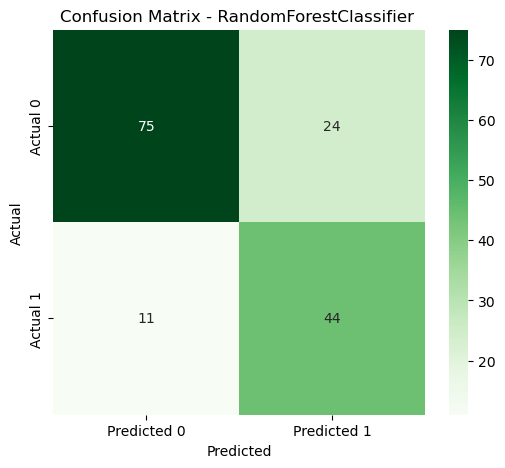

0.7727272727272727


In [30]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test ,grid_search.best_estimator_.predict(x_test)), annot=True, fmt='d', cmap="Greens", 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - RandomForestClassifier ')
plt.show()
test_accurcy.append(accuracy_score(y_test ,grid_search.best_estimator_.predict(x_test) ))
print(test_accurcy[-1])


In [31]:
dt=DecisionTreeClassifier()
param_grid={
    'criterion': ["gini", "entropy"], 
    'max_depth': [3,5], 
    'min_samples_split': [2, 5]
    
}
grid_search=GridSearchCV(estimator=dt, param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='accuracy')
grid_search.fit(x_s,y_s) 
print( ' best score is ', grid_search.best_score_)
print( ' best parameters is ', grid_search.best_params_) 

models.append('Decision Tree ')
accurcy.append( grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
 best score is  0.7706288819875776
 best parameters is  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


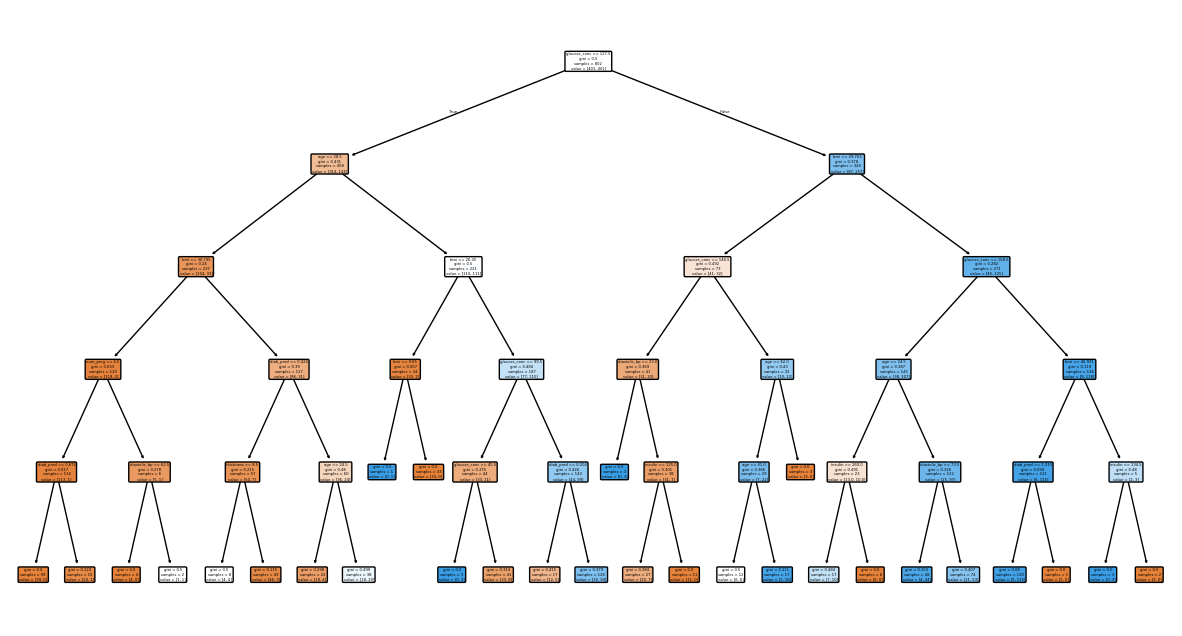

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=x_s.columns, rounded=True)
plt.show()

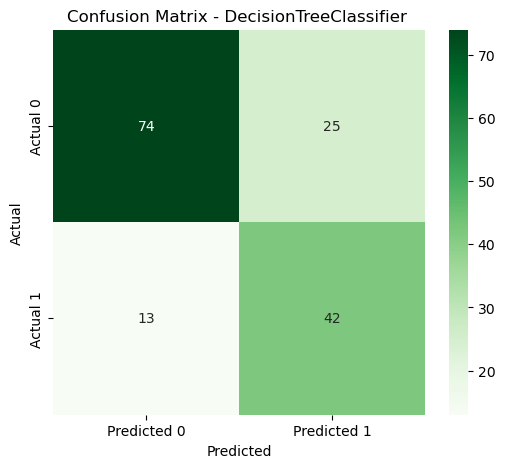

0.7532467532467533


In [33]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test ,grid_search.best_estimator_.predict(x_test)), annot=True, fmt='d', cmap="Greens", 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - DecisionTreeClassifier ')
plt.show()
test_accurcy.append(accuracy_score(y_test ,grid_search.best_estimator_.predict(x_test) ))
print(test_accurcy[-1])

In [34]:
lr = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['saga', 'liblinear'], 
    'max_iter': [100, 500]
}

grid_search = GridSearchCV(
    estimator=lr, 
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(x_s, y_s)

print('Best score is:', grid_search.best_score_)
print('Best parameters are:', grid_search.best_params_)


models.append('Logistic Regression ')
accurcy.append( grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best score is: 0.7593478260869565
Best parameters are: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


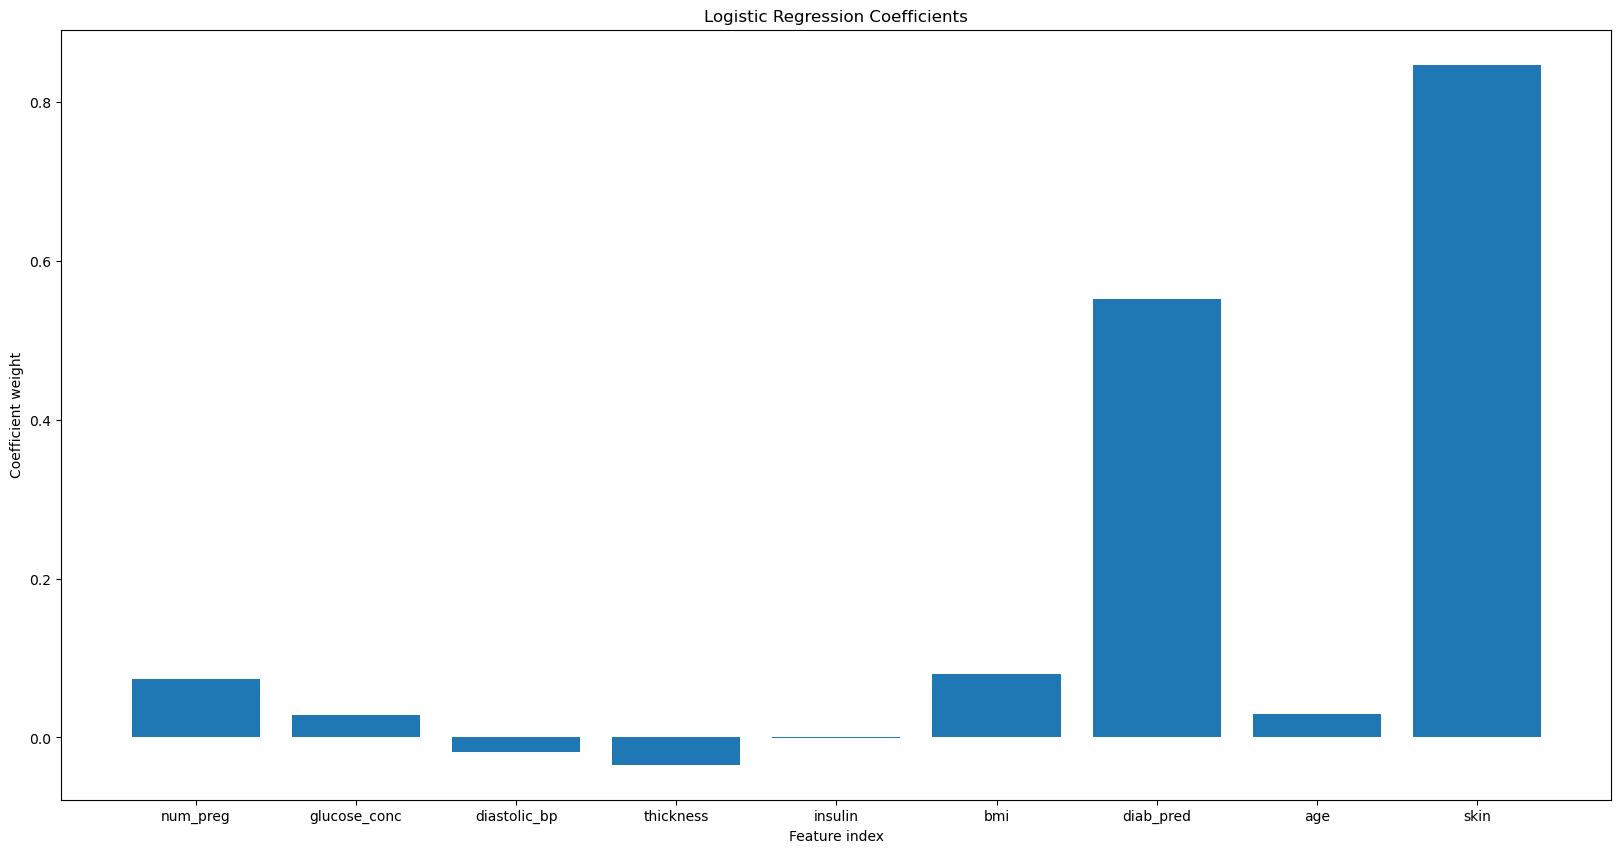

In [35]:
# important in LogisticRegression  
# x_s.columns names of features 
plt.figure(figsize=(20,10))
plt.bar(x_s.columns ,grid_search.best_estimator_.coef_[0])
plt.xlabel("Feature index")
plt.ylabel("Coefficient weight")
plt.title("Logistic Regression Coefficients")
plt.show()


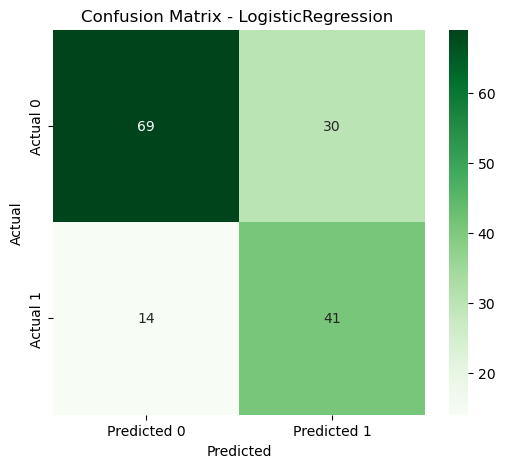

0.7142857142857143


In [36]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test ,grid_search.best_estimator_.predict(x_test)), annot=True, cmap="Greens", 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])



plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LogisticRegression ')
plt.show()
test_accurcy.append(accuracy_score(y_test ,grid_search.best_estimator_.predict(x_test) ))
print(test_accurcy[-1])

In [37]:
df_cleaned.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [38]:
df_cleaned.query('skin==0 ')

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
2,8,183,64,0,0,23.3,0.672,32,0.0,True
5,5,116,74,0,0,25.6,0.201,30,0.0,False
10,4,110,92,0,0,37.6,0.191,30,0.0,False
11,10,168,74,0,0,38.0,0.537,34,0.0,True
17,7,107,74,0,0,29.6,0.254,31,0.0,True
...,...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,0.0,True
758,1,106,76,0,0,37.5,0.197,26,0.0,False
759,6,190,92,0,0,35.5,0.278,66,0.0,True
762,9,89,62,0,0,22.5,0.142,33,0.0,False


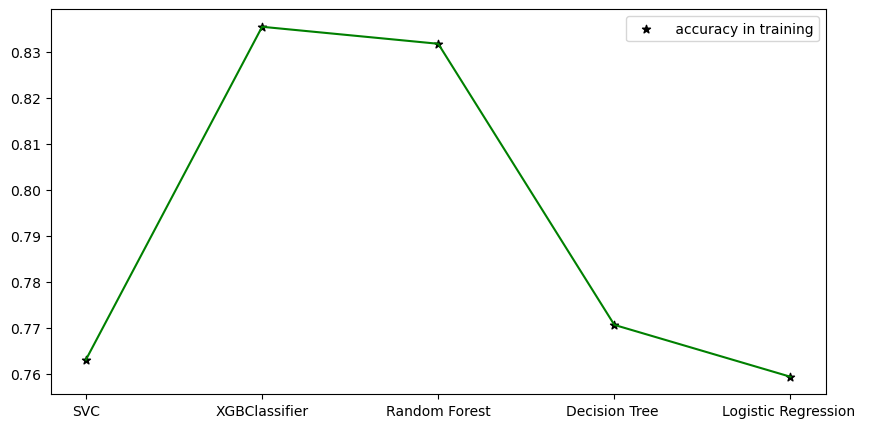

In [39]:
plt.figure(figsize=((10,5)))
plt.plot(models,accurcy,color='g' )
plt.scatter( models ,accurcy ,marker='*', label= ' accuracy in training', color='k'  )
plt.legend()
plt.show()


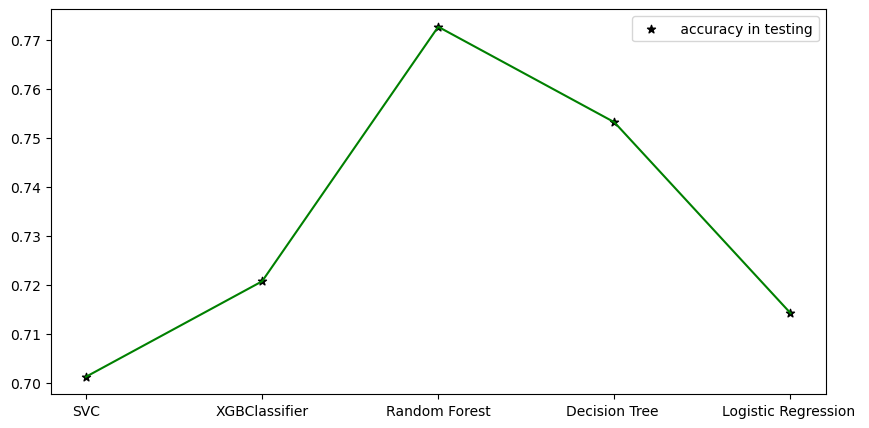

In [40]:
plt.figure(figsize=((10,5)))
plt.plot(models,test_accurcy,color='g' )
plt.scatter( models ,test_accurcy ,marker='*', label= ' accuracy in testing', color='k'  )
plt.legend()
plt.show()

In [41]:
print('the best model is ',models[2])
print('accurcy in testing ', test_accurcy[2])
print('score in training',accurcy[2])

the best model is  Random Forest
accurcy in testing  0.7727272727272727
score in training 0.8317546583850932


In [42]:
print(models[2],'\n',np.array(accurcy)[2],'\n',np.array(test_accurcy)[2])

Random Forest 
 0.8317546583850932 
 0.7727272727272727
